### S09 T02: Aprenentatge Supervisat - Regressions - part 1

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# open dataset from the previous exercise 
# this file has data cleaned (we handled missing values and droped non useful columns, explained in oprevious exercise)
# this file does not have yet dummy columns, I will generate them later before doing the regressions 
data = pd.read_csv('data.csv')
data.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest
0,-14.0,128.0,150.0,116.0,8.0,810,418.97,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2003.0,1955,2211.0,2225,1,3,4,WN,IAD,TPA
1,2.0,128.0,145.0,113.0,19.0,810,430.09,5.0,10.0,0.0,0.0,0.0,0.0,0.0,754.0,735,1002.0,1000,1,3,4,WN,IAD,TPA
2,14.0,96.0,90.0,76.0,8.0,515,406.58,3.0,17.0,0.0,0.0,0.0,0.0,0.0,628.0,620,804.0,750,1,3,4,WN,IND,BWI
3,34.0,90.0,90.0,77.0,34.0,515,401.30,3.0,10.0,2.0,0.0,0.0,0.0,32.0,1829.0,1755,1959.0,1925,1,3,4,WN,IND,BWI
4,11.0,101.0,115.0,87.0,25.0,688,474.48,4.0,10.0,0.0,0.0,0.0,0.0,0.0,1940.0,1915,2121.0,2110,1,3,4,WN,IND,JAX


This dataset is already cleaned from previous exercise. Because of memory issues and due to the large dataset, I'm having trouble performing the models, so I will select a sample of the dataset consisting of the 10% of the observations. I will stratify by UniqueCarrier to have a good representation of all Carriers.

In [4]:
data_sample = data.groupby('UniqueCarrier', group_keys= False).apply(lambda x : x.sample(frac=0.1, random_state = 0))

In [5]:
data_sample.shape

(192825, 24)

We are going to do a describe both for our data and for the sample to check if the sample represents the data correctly: 

In [6]:
data.describe().round(2)

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek
count,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00,1928255.00
mean,42.20,133.31,134.20,108.28,43.09,764.97,396.75,6.81,18.22,12.41,2.40,9.72,0.06,16.36,1518.64,1467.71,1610.25,1634.19,6.11,15.75,3.99
std,56.78,72.06,71.23,68.64,53.26,573.89,75.87,5.26,14.31,36.20,17.38,28.14,1.63,35.92,450.43,424.73,547.99,464.62,3.48,8.78,2.00
min,-70.00,14.00,-21.00,3.00,6.00,11.00,21.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00
25%,9.00,80.00,82.00,58.00,12.00,338.00,351.86,4.00,10.00,0.00,0.00,0.00,0.00,0.00,1203.00,1135.00,1316.00,1325.00,3.00,8.00,2.00
50%,24.00,116.00,116.00,90.00,24.00,606.00,403.82,6.00,14.00,0.00,0.00,0.00,0.00,0.00,1545.00,1510.00,1715.00,1705.00,6.00,16.00,4.00
75%,56.00,165.00,165.00,137.00,53.00,997.00,448.14,8.00,21.00,10.00,0.00,6.00,0.00,18.00,1900.00,1815.00,2030.00,2014.00,9.00,23.00,6.00
max,2461.00,1114.00,660.00,1091.00,2467.00,4962.00,993.60,240.00,422.00,2436.00,1352.00,1357.00,392.00,1316.00,2400.00,2359.00,2400.00,2359.00,12.00,31.00,7.00


In [7]:
data_sample.describe().round(2)

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek
count,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00,192825.00
mean,42.22,133.35,134.26,108.33,43.13,765.28,396.75,6.79,18.23,12.29,2.39,9.71,0.06,16.51,1518.86,1467.90,1611.12,1635.41,6.12,15.79,3.99
std,56.92,72.03,71.20,68.60,53.56,573.94,75.75,5.24,14.23,35.81,17.90,28.21,1.82,36.12,449.26,423.54,546.36,462.47,3.48,8.79,2.00
min,-59.00,15.00,15.00,7.00,6.00,31.00,51.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,9.00,80.00,82.00,58.00,12.00,338.00,352.08,4.00,10.00,0.00,0.00,0.00,0.00,0.00,1204.00,1135.00,1317.00,1326.00,3.00,8.00,2.00
50%,24.00,116.00,116.00,90.00,24.00,606.00,403.90,6.00,14.00,0.00,0.00,0.00,0.00,0.00,1545.00,1510.00,1715.00,1705.00,6.00,16.00,4.00
75%,56.00,165.00,165.00,137.00,53.00,998.00,447.90,8.00,21.00,10.00,0.00,6.00,0.00,18.00,1900.00,1815.00,2030.00,2014.00,9.00,23.00,6.00
max,1655.00,687.00,660.00,652.00,1597.00,4962.00,960.00,197.00,356.00,1312.00,1148.00,1289.00,392.00,889.00,2400.00,2359.00,2400.00,2359.00,12.00,31.00,7.00


We can observe the summary statistics are very similar, some min and max values change because we are taking only 10% of the data so these values may be a litlle different (we have in this dataset some heavy outliers). 

We will check if we have stratified correctly according to 'UniqueCarrier' column: 

In [8]:
# we use normalize = True because this way it´s easier to compare
data.UniqueCarrier.value_counts(normalize= True)

WN    0.195096
AA    0.099006
MQ    0.073238
UA    0.073073
OO    0.068329
DL    0.058978
XE    0.053490
CO    0.051721
US    0.050827
EV    0.042396
NW    0.040888
FL    0.036804
YV    0.034621
B6    0.028480
OH    0.027185
9E    0.026742
AS    0.020231
F9    0.014636
HA    0.003875
AQ    0.000385
Name: UniqueCarrier, dtype: float64

In [9]:
data_sample.UniqueCarrier.value_counts(normalize= True)

WN    0.195094
AA    0.099007
MQ    0.073237
UA    0.073071
OO    0.068331
DL    0.058976
XE    0.053489
CO    0.051720
US    0.050828
EV    0.042396
NW    0.040887
FL    0.036805
YV    0.034622
B6    0.028482
OH    0.027185
9E    0.026744
AS    0.020231
F9    0.014635
HA    0.003874
AQ    0.000384
Name: UniqueCarrier, dtype: float64

The proportions of Unique Carrier column are the same in our sample dataframe as in the original data. 

I generate again the dummy columns explained in the previous exercise, including the Delay Interval column I generated for delay intervals. I prefer to generate the dummies directly in the Notebook and not opening a file with dummy columns because doing it this way makes the dataframe less heavy in size (this is because of the data types). 

In [10]:
# now i will generate the dummy columns that are already explained in the previous exercise 
# create a column to categorize ArrDelay, explained in previous exercise
def delay_interval(x): 
    if x < 15: 
        return "Less than 15"
    elif x < 30: 
        return "Between 15 and 30"
    elif x < 60: 
        return "Between 30 and 60"
    else: 
        return "More than 60"
    

data_sample['DelayInterval'] = data_sample['ArrDelay'].apply(delay_interval)
data_sample.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,DelayInterval
143019,21.0,95.0,88.0,63.0,14.0,364,346.67,11.0,21.0,14.0,0.0,7.0,0.0,0.0,1711.0,1657,1746.0,1725,1,18,5,9E,DTW,EVV,Between 15 and 30
1886001,24.0,139.0,126.0,105.0,11.0,813,464.57,18.0,16.0,0.0,0.0,13.0,0.0,11.0,1100.0,1049,1419.0,1355,12,5,5,9E,AUS,ATL,Between 15 and 30
1881989,2.0,86.0,102.0,65.0,18.0,490,452.31,9.0,12.0,0.0,0.0,0.0,0.0,0.0,943.0,925,1209.0,1207,12,22,1,9E,RAP,MSP,Less than 15
1030789,37.0,114.0,90.0,87.0,13.0,442,304.83,4.0,23.0,13.0,0.0,24.0,0.0,0.0,1908.0,1855,2102.0,2025,6,12,4,9E,MEM,MLI,Between 30 and 60
687997,10.0,90.0,88.0,61.0,8.0,382,375.74,7.0,22.0,0.0,0.0,0.0,0.0,0.0,1038.0,1030,1208.0,1158,4,1,2,9E,DTW,ROA,Less than 15


In [11]:
# creating the dummy columns 
# we´ll use the param drop first = True so we don t have duplicated information 
# we are doing it the same way as previous exercise 
data_sample= pd.get_dummies(data = data_sample, columns = ['UniqueCarrier','Origin', 'Dest'], 
                            drop_first= True)
# map dummies for DelayInterval
data_sample['DelayInterval'] = data_sample['DelayInterval'].map({"Less than 15": 0, "Between 15 and 30": 1, 
                         "Between 30 and 60" : 2, "More than 60": 3})
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192825 entries, 143019 to 1544585
Columns: 637 entries, ArrDelay to Dest_YUM
dtypes: float64(15), int64(7), uint8(615)
memory usage: 146.9 MB


In [12]:
data_sample.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,DelayInterval,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,D

### - Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

#### Model 1 : Simple Linear Regression

First we´ll try a simple linear regression model. We´ll choose the feature that has a higher correlation with ArrDelay which is DepDelay, this way we can have a better understanding between the relation of these 2 features: 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# choose dependent variable 
y_simple = data_sample['ArrDelay']
# choose independent variable 
x_simple = data_sample['DepDelay']

First let´s explore the relation between 'ArrDelay' and 'DepDelay:

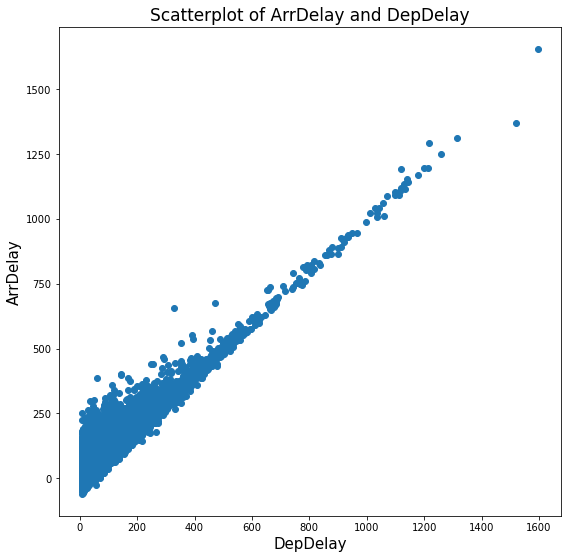

In [15]:
# scatterplot of dependent vs independent variable 
plt.figure(figsize = (9,9))
plt.scatter(x_simple, y_simple)
plt.title('Scatterplot of ArrDelay and DepDelay', fontsize = 17)
plt.xlabel('DepDelay',fontsize=15)
plt.ylabel('ArrDelay',fontsize=15); 

We note that the relationship between these 2 features is very linear, it is obvious they are highly correlated. 

In [16]:
# since the input has only 1 dimension, (1 feature), we reshape first
x_simple = x_simple.values.reshape(-1, 1)
x_simple.shape

(192825, 1)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# we´ll use a test size of 30%
simple_x_train, simple_x_test, simple_y_train, simple_y_test = train_test_split(x_simple, 
                            y_simple, test_size= 0.3, random_state= 10)

In [18]:
# doing the regression 
simple_reg = LinearRegression()
simple_reg.fit(simple_x_train, simple_y_train)

LinearRegression()

In [19]:
# import modules for the metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

We define functions to print the results: 

In [20]:
def print_results_test(true, predicted): 
    
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    
    print('R2 for test set : ', r2_square)
    print('MSE (mean squared error) for test set: ', mse)
    print('------------------------------------------')

In [21]:
def print_results_train(true, predicted): 
    
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    
    print('R2 for train set : ', r2_square)
    print('MSE (mean squared error) for train set: ', mse)

In [22]:
# predictions for test set 
simple_pred_test = simple_reg.predict(simple_x_test)

# predictions for train test 
simple_pred_train = simple_reg.predict(simple_x_train)

In [23]:
print_results_test(simple_y_test, simple_pred_test)
print_results_train(simple_y_train, simple_pred_train)

R2 for test set :  0.9095964548101837
MSE (mean squared error) for test set:  290.4797885539615
------------------------------------------
R2 for train set :  0.9098436088946702
MSE (mean squared error) for train set:  293.1189766509487


Despite we are using only 1 variable (DepDelay), the regression has a R2 for test set of 0.9098, which seems pretty high. 

+ R2 shows the percentage in the dependent variable (in our case 'ArrDelay') that is explained by the independent variables collectively (in this first example we are only uising 'DepDelay'). So we oberve that DepDelay alone is able to explain 91% of the variability of ArrDelay!!
+ MSE (Mean Squared Error) is a measure that tells us how close the regression is of the observed points. It measures the distance to the true observations. The lowe MSE, the better. In our Regression model we see MSE is a little higher in test set than in train set. 

In [24]:
# define a function to get the results to a dataframe: 
def get_results(true, predicted): 
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    
    return r2_square, mse    

In [25]:
# we will store the results on a Dataframe: 

results_df = pd.DataFrame(data = [['Simple Linear Regression', get_results(simple_y_test, simple_pred_test)[0], 
                        get_results(simple_y_test, simple_pred_test)[1], get_results(simple_y_train, simple_pred_train)[0], 
                        get_results(simple_y_train, simple_pred_train)[1]]], columns = ['Model', 'R2_test', 'MSE_test', 
                        'R2_train', 'MSE_train'])

results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977


We can plot the results in a graph of Actual against Predicted values, we will draw a 45° line, the closer the scatterplot to that line mean the better the predictions are. 

In [26]:
# we´ll do a df for test predictions and another one for train predictions 
simple_pred_test = pd.DataFrame({'y_test': simple_y_test, 'test_predictions' : simple_pred_test})

simple_pred_train = pd.DataFrame({'y_train' : simple_y_train, 'train_predictions' : simple_pred_train})

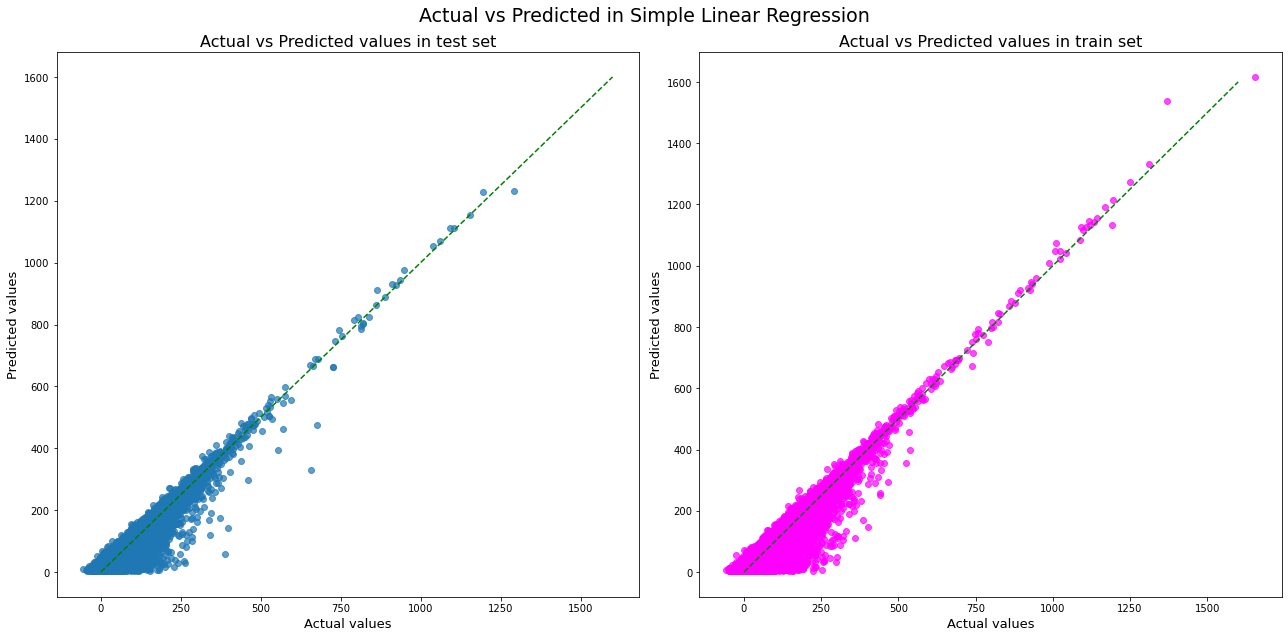

In [27]:
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Simple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= simple_pred_test['y_test'], y= simple_pred_test['test_predictions'] , alpha = 0.7)
plt.plot([0, 1600], [0, 1600], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test set', fontsize = 16)

plt.subplot(122)
plt.scatter(x=simple_pred_train['y_train'], y = simple_pred_train['train_predictions'], alpha = 0.7, c = 'magenta')
plt.plot([0, 1600], [0, 1600], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train set', fontsize = 16)
plt.tight_layout(); 

The much closer the plot to the 45° line, the better the predicitions. We see that only using the variable 'DepDelay' already gives a quite good prediction for both test ans train sets.

Since we are using only 2 variables, we can do a scatterlot of the 2 variables and include the regression line:

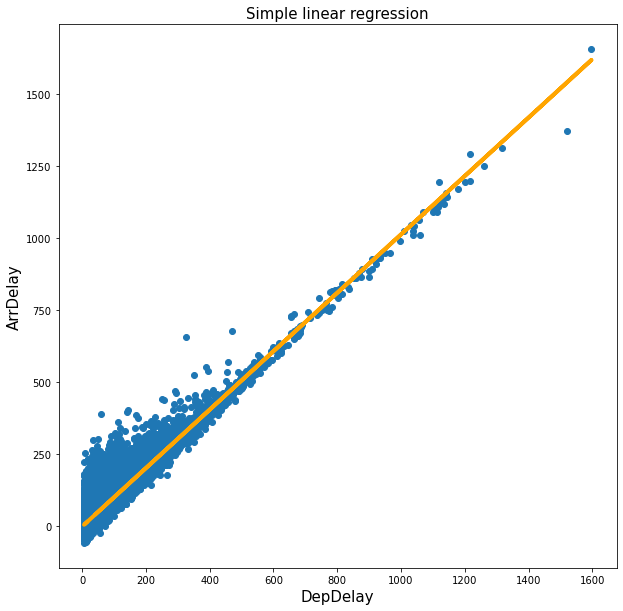

In [28]:
# regression line 
# we ´ll plot again the scatterplot of ArrDelay and DepDelay and we´ll include the regression line.
plt.figure(figsize=(10, 10))
# regression equation 
y_simple_hat = simple_reg.coef_* x_simple + simple_reg.intercept_
#plot the regression line 
plt.plot(x_simple, y_simple_hat, lw = 4, c = 'orange', label = 'regression line')
plt.scatter(x_simple, y_simple)
plt.xlabel('DepDelay',fontsize=15)
plt.ylabel('ArrDelay',fontsize=15)
plt.title('Simple linear regression', fontsize = 15)
plt.show()

We can calculate the error and plot it too: 

In [29]:
simple_pred_test['Error Value'] = simple_pred_test['y_test'] - simple_pred_test['test_predictions']
simple_pred_test.head()

,y_test,test_predictions,Error Value
338265,21.0,20.864767,0.135233
601643,42.0,55.304951,-13.304951
649027,13.0,4.657622,8.342378
1281879,20.0,6.683515,13.316485
859925,17.0,19.851821,-2.851821


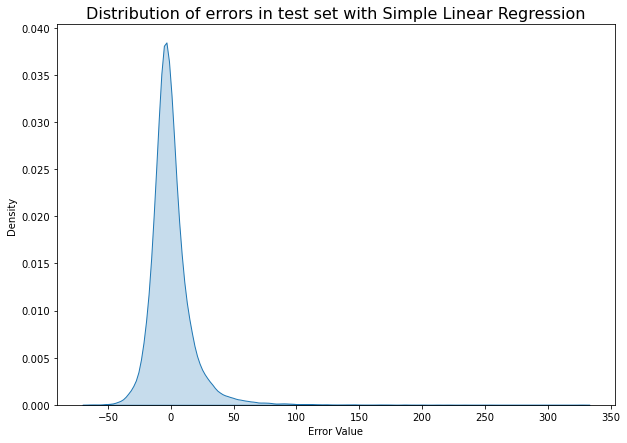

In [30]:
plt.figure(figsize=(10, 7))
plt.title('Distribution of errors in test set with Simple Linear Regression', fontsize = 16)
sns.kdeplot(data = simple_pred_test['Error Value'] , fill = True);


In [31]:
 simple_pred_test['Error Value'].describe().round(2)

count    57848.00
mean        -0.16
std         17.04
min        -64.72
25%         -9.23
50%         -2.70
75%          5.34
max        327.64
Name: Error Value, dtype: float64

The errors are centered around 0 but are a little right skewed (we see a max value for error of 327.64 minutes). 

#### Model 2 :Ridge Regression

Now let´s compare this simple Linear Regression with Ridge Regression. In this case we´ll take into account all the available features but we are going to evaluate first multicollinearity between all features.

We saw in the previous exercise that some independent variables are higly correlated between each other, so we will use 'Variance Inflation Factor' to evaluate which featutres we can drop.

In [32]:
# selecting the columns we want to evaluate correlation, we dont select dependent variable ArrDelay neither dummy columns
data_sample.columns[1:22]

Index(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay',
       'Distance', 'Speed', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth',
       'DayOfWeek', 'DelayInterval'],
      dtype='object')

In [33]:
# import module to evaluate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay','Distance', 'Speed', 'TaxiIn', 'TaxiOut', 
        'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','DepTime', 'CRSDepTime',
        'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth','DayOfWeek', 'DelayInterval']

In [34]:
# we ´ll define a function that loops across al features and show their multicollinearity
def calculate_vif(df, cols): 
    variables = df[cols]
    vif = pd.DataFrame()
    
    vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif['features'] = variables.columns
    return vif

In [35]:
calculate_vif(data_sample, cols)

,VIF,features
0,inf,ActualElapsedTime
1,1130.858287,CRSElapsedTime
2,inf,AirTime
3,227.018856,DepDelay
4,96.852037,Distance
5,32.232614,Speed
6,inf,TaxiIn
7,inf,TaxiOut
8,71.578302,CarrierDelay
9,16.891395,WeatherDelay


Some of the variables return infinite values!! We will have to drop some features but we can't remove all of those with high VIF values at once, because we could be deleting important info about the model. We will look at the correlation between the features and will only remove at the same time those features that are not correlated with each other:

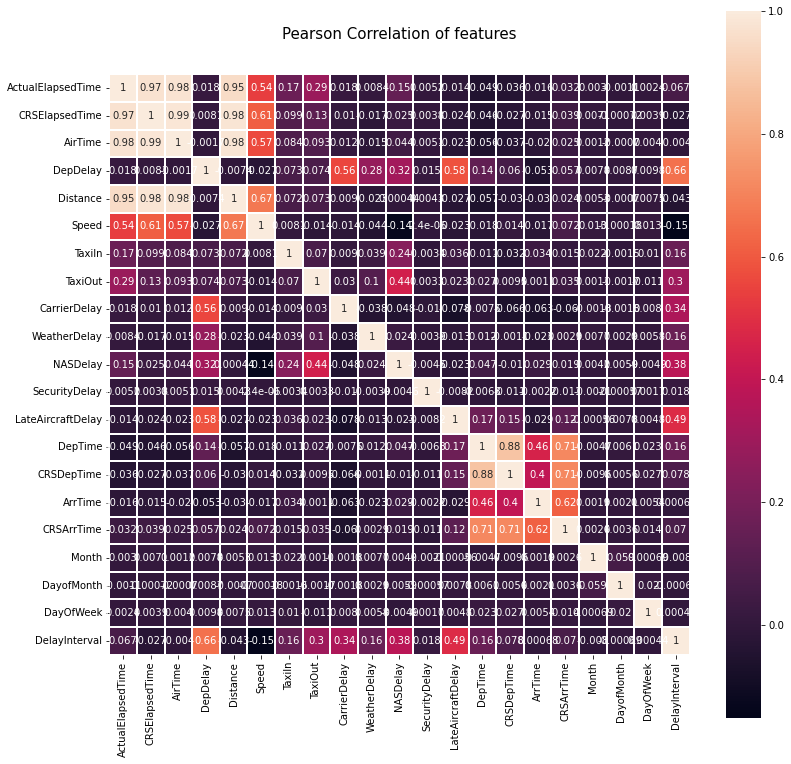

In [36]:
plt.figure(figsize = (13,13))

sns.heatmap(data_sample[cols].astype(float).corr(), linewidths=0.1,vmax=1.0, square = True,linecolor = 'white', 
            annot = True)
plt.title('Pearson Correlation of features', y=1.05, size = 15); 

Looking at this we will drop:

+ ActualElapsedTime : highly correlated with CRSElapsedTime and AirTime. For now, we will only keep AirTime.
+ DepDelay: we´ll keep it, we will remove this feature for Exercise 3.
+ Drop TaxiIn and keep TaxiOut
+ LateAircraftDelay: we´ll drop this one

In [37]:
data_cleaned = data_sample.copy()

In [38]:
data_cleaned.drop(['ActualElapsedTime', 'CRSElapsedTime', 'TaxiIn', 'LateAircraftDelay'], axis = 1, inplace = True)
data_cleaned.shape

(192825, 633)

With the remaining columns we check VIF again, the ideal situation would be keeping only those columns with VIF lower than 10. 

In [39]:
cols = cols = ['AirTime', 'DepDelay','Distance', 'Speed', 'TaxiOut', 
        'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay','DepTime', 'CRSDepTime',
        'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth','DayOfWeek', 'DelayInterval']

calculate_vif(data_sample, cols)

,VIF,features
0,101.027046,AirTime
1,5.240997,DepDelay
2,89.990705,Distance
3,27.187316,Speed
4,3.782014,TaxiOut
5,2.049906,CarrierDelay
6,1.255059,WeatherDelay
7,1.918727,NASDelay
8,1.003144,SecurityDelay
9,64.692422,DepTime


Now we´ll drop AirTime and CRSDepTime (these 2 are not highly correlated within each other, so we can remove them at once):

In [40]:
data_cleaned.drop(['AirTime', 'CRSDepTime'], axis = 1, inplace = True)
data_cleaned.shape

(192825, 631)

In [41]:
# check again
cols = ['DepDelay','Distance', 'Speed', 'TaxiOut', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay','DepTime',
        'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth','DayOfWeek', 'DelayInterval']

calculate_vif(data_sample, cols)

,VIF,features
0,5.124971,DepDelay
1,4.495940,Distance
2,25.347944,Speed
3,3.776428,TaxiOut
4,2.027584,CarrierDelay
5,1.249845,WeatherDelay
6,1.873349,NASDelay
7,1.003001,SecurityDelay
8,25.708232,DepTime
9,15.701616,ArrTime


'Speed' and 'CRSArrTime' are not correlated, so we can drop them at once:

In [42]:
data_cleaned.drop(['Speed', 'CRSArrTime'], axis = 1, inplace= True)
data_cleaned.shape

(192825, 629)

In [43]:
cols = ['DepDelay','Distance','TaxiOut', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay','DepTime',
        'ArrTime', 'Month', 'DayofMonth','DayOfWeek', 'DelayInterval']

calculate_vif(data_sample, cols)

,VIF,features
0,5.006072,DepDelay
1,2.625796,Distance
2,3.619042,TaxiOut
3,2.007823,CarrierDelay
4,1.243499,WeatherDelay
5,1.799928,NASDelay
6,1.002818,SecurityDelay
7,14.227908,DepTime
8,11.345255,ArrTime
9,3.713597,Month


Now we'll drop DepTime:

In [44]:
data_cleaned.drop(['DepTime'], axis = 1, inplace= True)
data_cleaned.shape

(192825, 628)

In [45]:
cols = ['DepDelay','Distance','TaxiOut', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay',
        'ArrTime', 'Month', 'DayofMonth','DayOfWeek', 'DelayInterval']

calculate_vif(data_sample, cols)

,VIF,features
0,4.839350,DepDelay
1,2.615133,Distance
2,3.559933,TaxiOut
3,1.970225,CarrierDelay
4,1.235062,WeatherDelay
5,1.765773,NASDelay
6,1.002603,SecurityDelay
7,6.136878,ArrTime
8,3.650797,Month
9,3.769457,DayofMonth


Now all of our features have a VIF smaller than 10, which is the recomended limit for VIF values. We have dropped 9 features. Now let´s proceed with our models:

In [46]:
# save this df to csv
#data_cleaned.to_csv('data_cleaned.csv', index = False)

In [47]:
from sklearn.model_selection import train_test_split

# select dependent variable 
y = data_cleaned['ArrDelay']
# independent variables 
X = data_cleaned.drop(['ArrDelay'], axis = 1)

In [48]:
print('data_cleaned.shape: ' , data_cleaned.shape)
print('y.shape: ', y.shape)
print('X.shape: ', X.shape)

data_cleaned.shape:  (192825, 628)
y.shape:  (192825,)
X.shape:  (192825, 627)


In [49]:
# use test size of 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [50]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (134977, 627)
X_test.shape:  (57848, 627)
y_train.shape:  (134977,)
y_test.shape:  (57848,)


Now we will apply our Ridge Regression model, used when data has multicollinearity. Altough we have removed variables with high VIF we still have a lot of features in our model. 

In [51]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [52]:
ridge_test_prediction = ridge.predict(X_test)
ridge_train_prediction = ridge.predict(X_train)

print_results_test(y_test, ridge_test_prediction)
print_results_train(y_train, ridge_train_prediction)

R2 for test set :  0.9728951602159603
MSE (mean squared error) for test set:  87.54991975163803
------------------------------------------
R2 for train set :  0.9729783616559122
MSE (mean squared error) for train set:  87.65876185372439


We see R2 is higer than in Simple Linear Regression and MSE is lower, it makes sense because this time we are including a lot of features.

In [53]:
# keep the results in a dataframe 
results_df_2 = pd.DataFrame(data = [['Ridge Regression', get_results(y_test, ridge_test_prediction)[0], 
                                    get_results(y_test, ridge_test_prediction)[1], 
                                    get_results(y_train, ridge_train_prediction)[0], 
                                    get_results(y_train, ridge_train_prediction)[1]]], columns = ['Model', 
                                   'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
results_df = pd.concat([results_df, results_df_2])
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977
0,Ridge Regression,0.972895,87.549920,0.972978,87.658762


Now we can plot Actual Values versus Predicted Values for both sets:

In [54]:
# we´ll do a df for test predictions and another one for train predictions 
ridge_pred_test = pd.DataFrame({'y_test': y_test, 'test_predictions' : ridge_test_prediction})

ridge_pred_train = pd.DataFrame({'y_train' : y_train, 'train_predictions' : ridge_train_prediction})

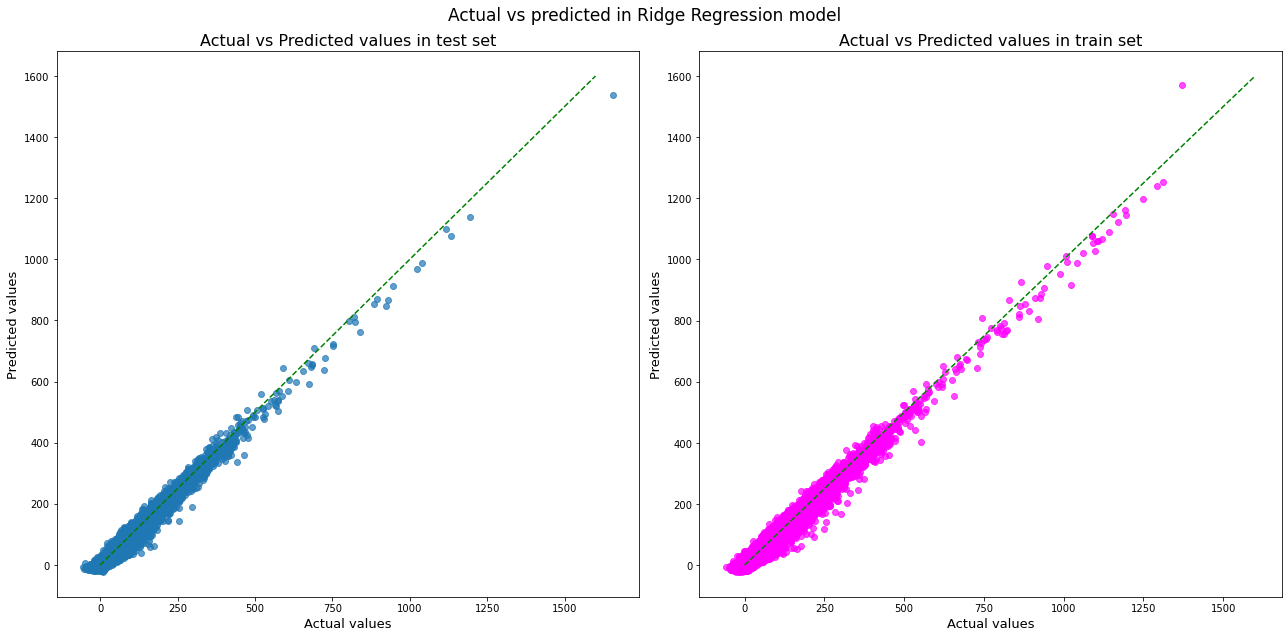

In [55]:
# now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs predicted in Ridge Regression model', fontsize = 17)

plt.subplot(121)
plt.scatter(x= ridge_pred_test['y_test'], y= ridge_pred_test['test_predictions'] , alpha = 0.7)
plt.plot([0, 1600], [0, 1600], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test set', fontsize = 16)

plt.subplot(122)
plt.scatter(x=ridge_pred_train['y_train'], y = ridge_pred_train['train_predictions'], alpha = 0.7, c = 'magenta')
plt.plot([0, 1600], [0, 1600], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train set', fontsize = 16)
plt.tight_layout(); 

The line is thinner around the 45° line than with Simple Linear Regression, which may mean that this model predicts better (we´re using a lot of features this time).

In [56]:
# now we will plot the errors of the test set 
ridge_errors_df = pd.DataFrame({'Error Values' : (y_test-ridge_test_prediction)})
ridge_errors_df.head()

,Error Values
1633320,-0.473077
1840639,-3.185111
1359883,-1.834519
1872293,6.457592
163638,13.857097


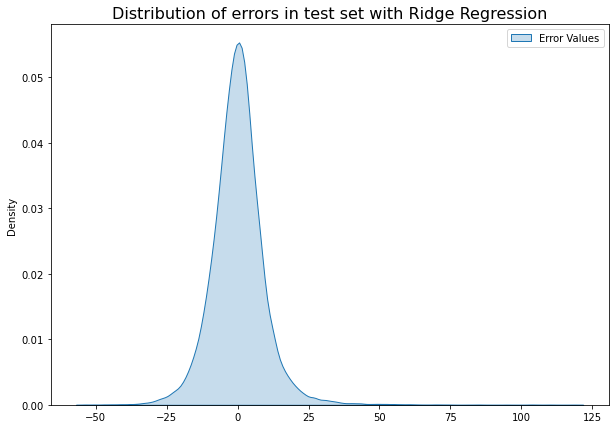

In [57]:
# now we plot it 
plt.figure(figsize=(10, 7))
plt.title('Distribution of errors in test set with Ridge Regression', fontsize = 16)
sns.kdeplot(data = ridge_errors_df, fill = True); 

In [58]:
ridge_errors_df.describe().round(2)

,Error Values
count,57848.00
mean,0.05
std,9.36
min,-53.86
25%,-5.12
50%,-0.08
75%,4.77
max,118.69


Now the errors seem more concentrated around value zero than with the Simple Linear Regression. Just looking at the quartiles and the min and max values we see that this distribution is closer to normal distribution than before (altough some errors are large according to min and max values)

#### Model 3 : Random Forest Regression

We already have our train set and our test set from our previous regression, now we'll use the Random Forest Regressor.

In [59]:
from sklearn.ensemble import RandomForestRegressor
# choose n_estimators to 50
regressor = RandomForestRegressor(n_estimators= 50, random_state= 0)

regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [60]:
forest_test_prediction = regressor.predict(X_test)
forest_train_prediction = regressor.predict(X_train)

In [61]:
print_results_test(y_test,forest_test_prediction )
print_results_train(y_train, forest_train_prediction)

R2 for test set :  0.9881187247720432
MSE (mean squared error) for test set:  38.37708324574747
------------------------------------------
R2 for train set :  0.998282711047142
MSE (mean squared error) for train set:  5.570921401423946


Again test set R2 is slightly lower than for train set, but we see a high difference in MSE, MSE of train set is much lower than in test set!!

In [62]:
# keep the results in a dataframe: 
results_df_3 = pd.DataFrame(data = [['Random Forest Regression', get_results(y_test,forest_test_prediction)[0],
                                    get_results(y_test,forest_test_prediction)[1], 
                                    get_results(y_train, forest_train_prediction)[0], 
                                    get_results(y_train, forest_train_prediction)[1]]], columns = 
                                    ['Model', 'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
results_df = pd.concat([results_df, results_df_3])
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977
0,Ridge Regression,0.972895,87.549920,0.972978,87.658762
0,Random Forest Regression,0.988119,38.377083,0.998283,5.570921


In [63]:
# we´ll do a df for test predictions and another one for train predictions
forest_test_df = pd.DataFrame({'y_test': y_test, 'test_predictions' : forest_test_prediction})
forest_train_df = pd.DataFrame({'y_train' : y_train, 'train_predictions' : forest_train_prediction})

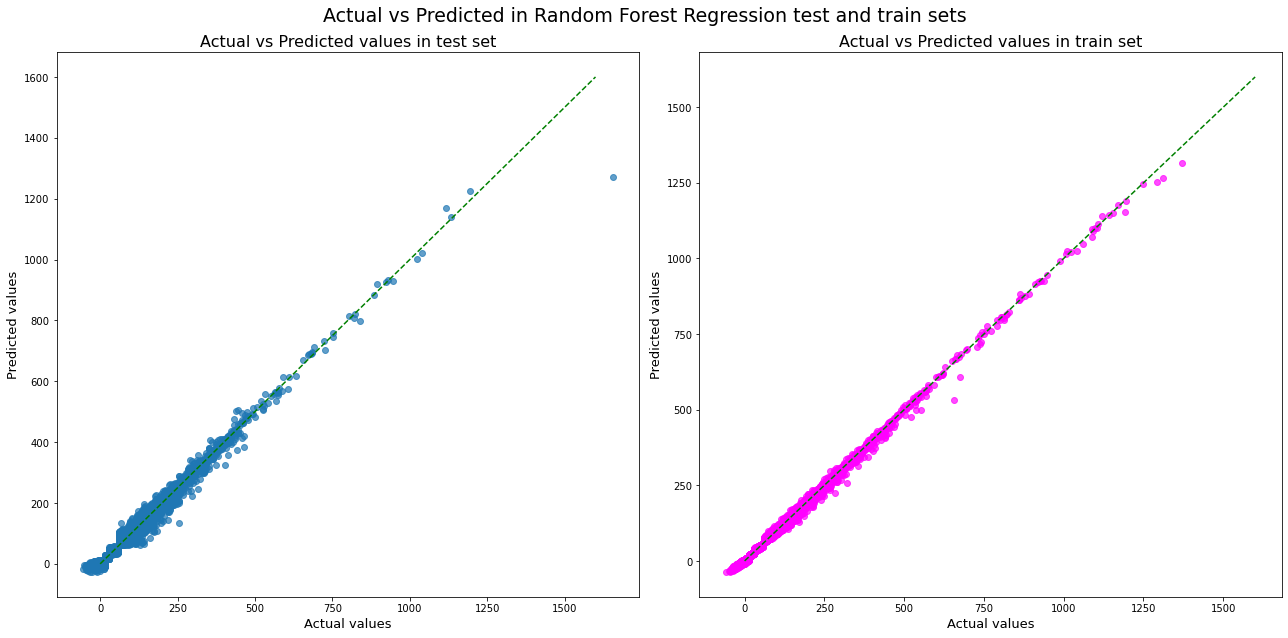

In [64]:
# now we will plot actual vs predicted both on test and train sets 
plt.figure(figsize= (18,9))
plt.suptitle('Actual vs Predicted in Random Forest Regression test and train sets', fontsize = 19)

plt.subplot(121)
plt.scatter(x= forest_test_df['y_test'], y = forest_test_df['test_predictions'], alpha = 0.7)
plt.plot([0, 1600], [0, 1600], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test set', fontsize = 16)

plt.subplot(122)
plt.scatter(x= forest_train_df['y_train'], y = forest_train_df['train_predictions'], alpha = 0.7, c = 'magenta')
plt.plot([0, 1600], [0, 1600], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train set', fontsize = 16)
plt.tight_layout(); 

We can see the plot fits almost perfectly the 45° line and is thinner than in the previous regressions. Now let´s look at the test errors distribution: 

In [65]:
forest_errors_df =  pd.DataFrame({'Error Values' : (y_test -forest_test_prediction)})

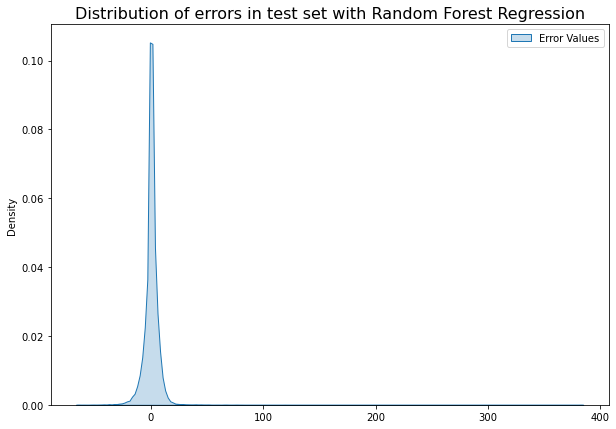

In [66]:
# now we plot it 
plt.figure(figsize=(10, 7))
plt.title('Distribution of errors in test set with Random Forest Regression', fontsize = 16)
sns.kdeplot(data = forest_errors_df, fill = True); 

In [67]:
forest_errors_df.describe().round(2)

,Error Values
count,57848.00
mean,0.03
std,6.19
min,-64.82
25%,-1.54
50%,0.00
75%,2.16
max,382.78


Altough we see an error of 382.78 minutes (see max value), looking at the mean of errors and the quartiles we clearly see that this time errors are more concentrated around zero than in the previous regressions. 

#### Model 4: XGBoost Regressor

Lastly, we will use the XGBoost Regression algorithm to predict ArrDelay. This algorithm is know by its good results and efficiency in its performance, let´s check how good it performs in our dataset.

In [68]:
# we already have our X and y split, import the needed library 
from xgboost import XGBRegressor
# instantiate the model 
XGB_regressor = XGBRegressor()
# fit train set 
XGB_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [69]:
XGB_test_prediction = XGB_regressor.predict(X_test)
XGB_train_prediction = XGB_regressor.predict(X_train)

In [70]:
print_results_test(y_test,XGB_test_prediction )
print_results_train(y_train, XGB_train_prediction)

R2 for test set :  0.9882029254052389
MSE (mean squared error) for test set:  38.105111201712205
------------------------------------------
R2 for train set :  0.9913355159782089
MSE (mean squared error) for train set:  28.10776799615331


Again R2 for training set is a little higher and MSE a little lower. We are having a very high R2 for both test and train so it may be difficult to improve our model.  

In [71]:
# save the results in a df
results_df_4 = pd.DataFrame(data = [['XGBoost Regression', get_results(y_test,XGB_test_prediction)[0], 
                                    get_results(y_test,XGB_test_prediction)[1], get_results(y_train,XGB_train_prediction)[0], 
                                    get_results(y_train,XGB_train_prediction)[1]]], columns = ['Model', 'R2_test', 'MSE_test', 
                                   'R2_train', 'MSE_train'])
results_df = pd.concat([results_df, results_df_4])
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977
0,Ridge Regression,0.972895,87.549920,0.972978,87.658762
0,Random Forest Regression,0.988119,38.377083,0.998283,5.570921
0,XGBoost Regression,0.988203,38.105111,0.991336,28.107768


In [72]:
# df actual and predicted 
XGB_test_df = pd.DataFrame({'y_test': y_test, 'test_predictions' : XGB_test_prediction})
XGB_train_df = pd.DataFrame({'y_train' : y_train, 'train_predictions' : XGB_train_prediction})

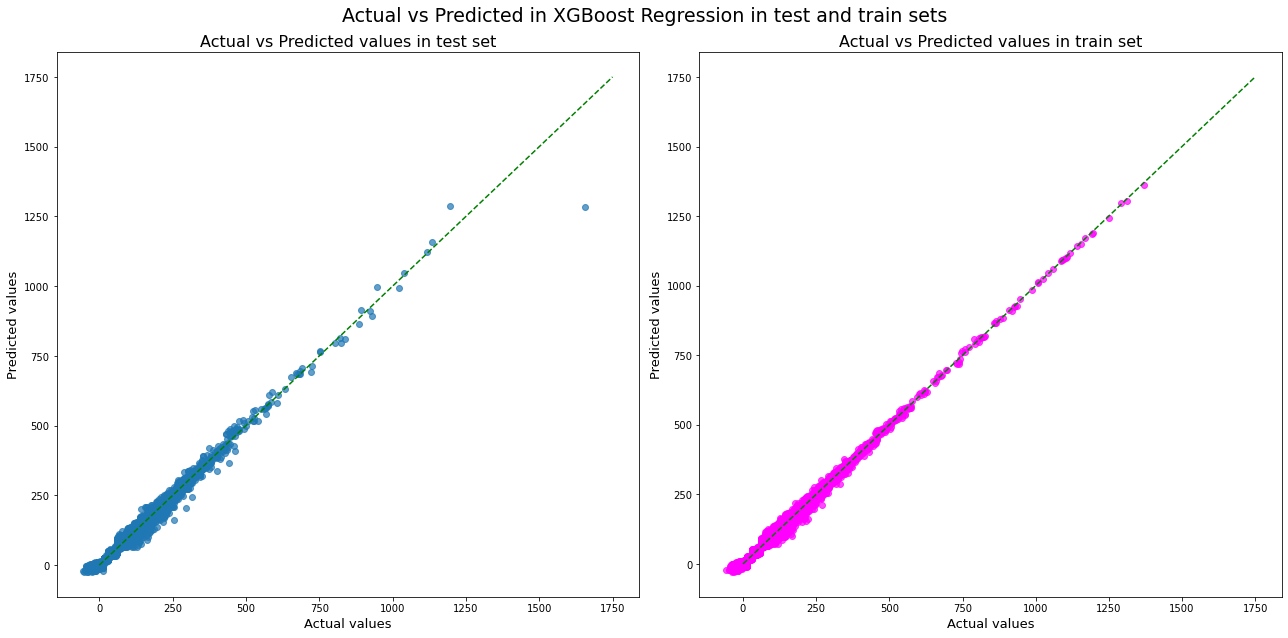

In [73]:
# plot actual vs predicted 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in XGBoost Regression in test and train sets', fontsize = 19)

plt.subplot(121)
plt.scatter(x= XGB_test_df['y_test'], y = XGB_test_df['test_predictions'] , alpha = 0.7)
plt.plot([0, 1750], [0, 1750], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test set', fontsize = 16)

plt.subplot(122)
plt.scatter(x=XGB_train_df['y_train'], y = XGB_train_df['train_predictions'], alpha = 0.7, c = 'magenta')
plt.plot([0, 1750], [0, 1750], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train set', fontsize = 16)
plt.tight_layout(); 

The plot seems a little closer to the 45° line in the train set and seems that some points are more dispersed in test subset  but is showing a very high predictive power in both cases. 

In [74]:
# create df of errors in test set
XGBoost_errors_df = pd.DataFrame({'Error Values' : (y_test -XGB_test_prediction)})

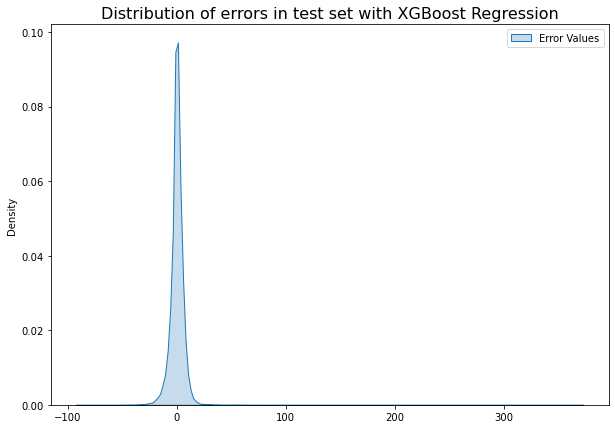

In [75]:
# now we plot it 
plt.figure(figsize=(10, 7))
plt.title('Distribution of errors in test set with XGBoost Regression', fontsize = 16)
sns.kdeplot(data = XGBoost_errors_df, fill = True); 

In [76]:
XGBoost_errors_df.describe().round(2)

,Error Values
count,57848.00
mean,-0.01
std,6.17
min,-90.45
25%,-2.50
50%,0.09
75%,2.90
max,370.95


The distribution is very similar to the Random Forest Regresssion, it is pretty centered around zero value despite the presence of some high errors (see min and max values). 

### - Exercici 2

Compara’ls en base al MSE i al R2 .

To compare the 4 models we have created we can use our results_df.

In [77]:
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977
0,Ridge Regression,0.972895,87.549920,0.972978,87.658762
0,Random Forest Regression,0.988119,38.377083,0.998283,5.570921
0,XGBoost Regression,0.988203,38.105111,0.991336,28.107768


+ Results are very similar in both train and test set, models have a higher R2 for train set but the difference is very small.
+ MSE in train is a little higher in train sets in Linear Regression model compared to test set, but at the same time MSE is significantly smaller in train sets in the case of XGBoost Regression and specially in Random Forest.

In [78]:
results = results_df.set_index('Model')

We can plot these results in a graph to do a comparison, we will look first at R2 results:

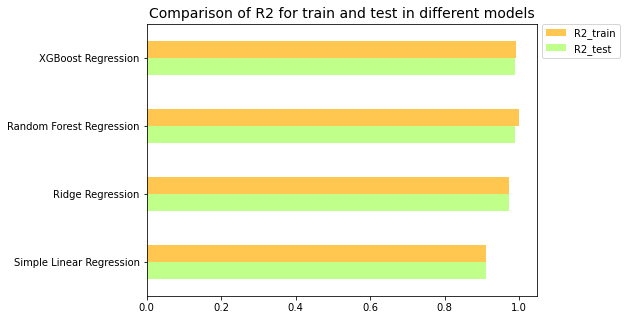

In [79]:
ax = results[['R2_test', 'R2_train']].plot(kind='barh', figsize=(7, 5), color = ['#c0ff89', '#ffc650'] )
ax.set_title('Comparison of R2 for train and test in different models', fontsize = 14)
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02)); 

+ In all cases R2 is higher in train set but the difference with test set is very small.
+ The model that has a better R2 in test set is XGBoost Regression and the lower R2 belongs to Simple Linear Regression.

Now we can do the same for MSE results:

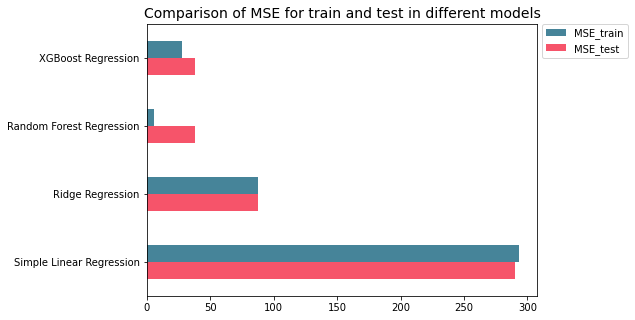

In [80]:
ax = results[['MSE_test', 'MSE_train']].plot(kind='barh', figsize=(7, 5), color = ['#f6546a', '#468499'] )
ax.set_title('Comparison of MSE for train and test in different models', fontsize = 14)
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02)); 

+ MSE is smaller in Random Forest and in XGBoost than in the other 2 models (these models minimize errors much more than Simple Linear Regression and Ridge Regression)
+ In Simple Linear Regression MSE is a little higher in train set (but the difference is very small)
+ In XGBoost Regression and specially in Random Forest Regression MSE is significantly smaller in train set

### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

#### Simple Linear Regression

We can check the parameters we used in the regression with the method get_params(). We' ll look at the parameters used and then change one.

In [81]:
simple_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

We can see that the parameter 'fit_intercept' is set to True by default. The intercept( also called the constant) is the expected value (or predicted value) of y when X (or independent variable) is zero (intercept is the constant of the regression equation). In our model the intecept was:

In [82]:
simple_reg.intercept_

-1.4200579480792328

In our Simple Regression we only used one feature, DepDelay (delay in the departure of the flight) as independent variable, this intercept means that in the cases where DepDelay equals 0 the Arrival Delay is expected to be -1,42 (the flight arrives 1,4 minutes earlier if the flight departs on time).

Let´s check how our model changes if we set fit_intercep = False:

In [83]:
simple_reg_no_intercept = LinearRegression(fit_intercept= False)
simple_reg_no_intercept.fit(simple_x_train, simple_y_train)

LinearRegression(fit_intercept=False)

In [84]:
# predictions for test set 
simple_pred_test_no_intercept = simple_reg_no_intercept.predict(simple_x_test)

# predictions for train test 
simple_pred_train_no_intercept = simple_reg_no_intercept.predict(simple_x_train)

print_results_test(simple_y_test, simple_pred_test_no_intercept)
print_results_train(simple_y_train, simple_pred_train_no_intercept )

R2 for test set :  0.9090716633878027
MSE (mean squared error) for test set:  292.166020007475
------------------------------------------
R2 for train set :  0.9094669729505063
MSE (mean squared error) for train set:  294.3435059513098


R2 is now a little lower, and MSE a little higher, it seems removing the intercept has decreased the predictive power of our model. 

In [85]:
# save the results 
results_df_5 = pd.DataFrame(data= [['Simple Linear Regression no intercept', 
                            get_results(simple_y_test, simple_pred_test_no_intercept)[0],
                            get_results(simple_y_test, simple_pred_test_no_intercept)[1], 
                            get_results(simple_y_train, simple_pred_train_no_intercept)[0], 
                            get_results(simple_y_train, simple_pred_train_no_intercept)[1]]], 
                            columns = ['Model', 'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
results_df = pd.concat([results_df, results_df_5])
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977
0,Ridge Regression,0.972895,87.549920,0.972978,87.658762
0,Random Forest Regression,0.988119,38.377083,0.998283,5.570921
0,XGBoost Regression,0.988203,38.105111,0.991336,28.107768
0,Simple Linear Regression no intercept,0.909072,292.166020,0.909467,294.343506


We will do a scatterplot of ArrDelay And DepDelay and we will draw the 2 regression lines, the one with intercept and the one without intercept. 

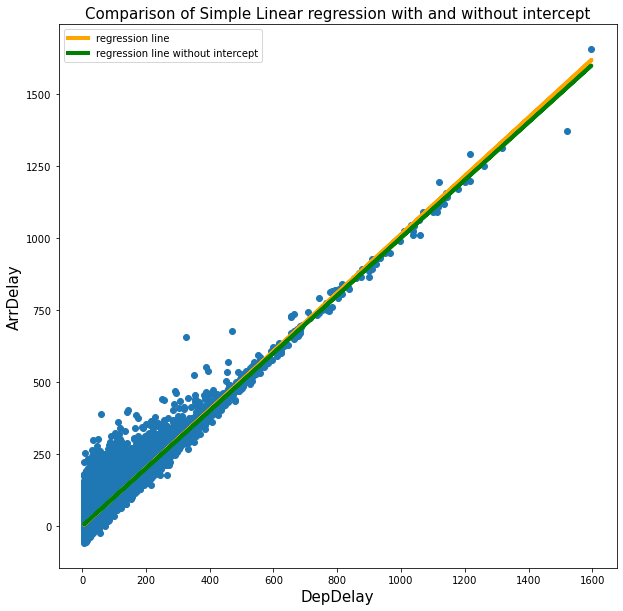

In [86]:
plt.figure(figsize=(10, 10))
# regression equation 
y_simple_hat = simple_reg.coef_* x_simple + simple_reg.intercept_ # regression line with intercept
y_simple_hat_no_intercept = simple_reg_no_intercept.coef_*x_simple # regression line without intercept
#plot the regression line 
plt.plot(x_simple, y_simple_hat, lw = 4, c = 'orange', label = 'regression line')
plt.plot(x_simple, y_simple_hat_no_intercept, lw =4, c = 'green', label= 'regression line without intercept')
plt.scatter(x_simple, y_simple)
plt.xlabel('DepDelay',fontsize=15)
plt.ylabel('ArrDelay',fontsize=15)
plt.legend()
plt.title('Comparison of Simple Linear regression with and without intercept', fontsize = 15)
plt.show()

We observe than in our model the two regression lines seem very similar (R2 is also similar in both cases, 0.909).

In our original regression intercept was -1.42 (ArrDelay was -1.42 min when DepDelay was 0). We can calculate the p-value of the intercept of our previous model (the model with interceot) to see if the intercept is significant for the model:

In [87]:
# to calculate the p values we will use statsmodel module 
import statsmodels.api as sm
# define the intercept 
x = sm.add_constant(simple_x_train)
# do the regression with intercept 
regression = sm.OLS(simple_y_train, x )
regression = regression.fit()

In [88]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.362e+06
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:24:10   Log-Likelihood:            -5.7490e+05
No. Observations:              134977   AIC:                         1.150e+06
Df Residuals:                  134975   BIC:                         1.150e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4201      0.060    -23.746      0.000      -1.537      -1.303
x1             1.0129      0.001   1167.110      0.000       1.011       1.015
==============================================================================
Omnibus:                    82571.611   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1751003.095
Skew:                           2.569   Prob(JB):                         0.00
Kurtosis:                      19.880   Cond. No.                         88.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ We observe doing the Regression with statsmodel returns the same results as using sklearn: R2 is the same as in model (0.910, 0.909844 with SKLearn) and the intercept is the same too.
+ According to the p-value the intercept is significant in our model, since p value is zero (here the null hypothesis is that intercept has no predictive power)

#### Ridge Regression

In [89]:
# look at the parameters used in the previous model 
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

We can change the value of alpha : According to sklearn page: " Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization". We will use GridDSearch to look which alpha value is best to maximize R2. 

In [90]:
from sklearn.model_selection import GridSearchCV
# define the params we want to evaluate 
parameters = {'alpha' : [0.75, 1.25, 1.75] }

tuned_ridge = Ridge()

clf = GridSearchCV(estimator = tuned_ridge, param_grid=parameters, scoring = 'r2', verbose = 1)
clf.fit(X_train,y_train)

print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'alpha': 1.75}


In [91]:
# best parameters return an alpha of 1.75, so we will try this parameter in our model 

ridge_tuned = Ridge(alpha = 1.75)
ridge_tuned.fit(X_train, y_train)

Ridge(alpha=1.75)

In [92]:
ridge_tuned_test_prediction = ridge_tuned.predict(X_test)
ridge_tuned_train_prediction = ridge_tuned.predict(X_train)

print_results_test(y_test, ridge_tuned_test_prediction)
print_results_train(y_train, ridge_tuned_train_prediction)

R2 for test set :  0.9728971632080551
MSE (mean squared error) for test set:  87.54344999204696
------------------------------------------
R2 for train set :  0.972976916178329
MSE (mean squared error) for train set:  87.66345101333845


R2 is sligtly higher in this case, and MSE a little lower compared to the case when we used alpha =0.1. It seems changing this parameter has worked well for our model. The results we got before where: 

In [93]:
# see results with initial parameters
results_df[1:2]

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Ridge Regression,0.972895,87.54992,0.972978,87.658762


In [94]:
# we will save this results 
results_df_6 = pd.DataFrame(data=[['Tuned Ridge Regression', get_results(y_test, ridge_tuned_test_prediction)[0],
                                  get_results(y_test, ridge_tuned_test_prediction)[1], 
                                  get_results(y_train, ridge_tuned_train_prediction)[0], 
                                  get_results(y_train, ridge_tuned_train_prediction)[1]]] , columns =['Model',
                                  'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
results_df = pd.concat([results_df, results_df_6])

In [95]:
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977
0,Ridge Regression,0.972895,87.549920,0.972978,87.658762
0,Random Forest Regression,0.988119,38.377083,0.998283,5.570921
0,XGBoost Regression,0.988203,38.105111,0.991336,28.107768
0,Simple Linear Regression no intercept,0.909072,292.166020,0.909467,294.343506
0,Tuned Ridge Regression,0.972897,87.543450,0.972977,87.663451


#### Random Forest Regression

Now we´ll change parameters of our Random Forest Regression, altough default parameter for n_estimators is 100, in the previous model I changed it to 50 to speed up the model, let´s see if we got better results setting n_estimators to 100. 

In [96]:
# look for params of our previous model 
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

We will now train our model with max_depth :7 and n_stimators = 100 (before it was None and 50).

+ Max_depth refers to the minimum number of samples each branch must have after splitting a node.
+ n_stimator refers to the number of trees in the forest. Before we set it to 50 to speed the model but the default mode is 100 so we will do now 100 trees.

In [97]:
# instantiate and fit our model with the new parameters
regressor_changed = RandomForestRegressor(n_estimators = 100, max_depth = 7, random_state=0)
regressor_changed.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=0)

In [98]:
forest_changed_test_prediction = regressor_changed.predict(X_test)
forest_changed_train_prediction = regressor_changed.predict(X_train)

print_results_test(y_test, forest_changed_test_prediction)
print_results_train(y_train, forest_changed_train_prediction)

R2 for test set :  0.9782949798048104
MSE (mean squared error) for test set:  70.10824603418195
------------------------------------------
R2 for train set :  0.97961801386437
MSE (mean squared error) for train set:  66.11959075235038


R2 is lower and mse is higher than before!!! Maybe the max_depth parameter was not worth changing, we 'll repeat leaving the default and repeat the model only changing number of estimators (number of trees)

In [99]:
regressor_changed2 = RandomForestRegressor(n_estimators= 100, random_state= 0)
regressor_changed2.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [100]:
forest_changed2_test_prediction = regressor_changed2.predict(X_test)
forest_changed2_train_prediction = regressor_changed2.predict(X_train)

In [101]:
print_results_test(y_test, forest_changed2_test_prediction)
print_results_train(y_train, forest_changed2_train_prediction)

R2 for test set :  0.9882930131220383
MSE (mean squared error) for test set:  37.81412359805006
------------------------------------------
R2 for train set :  0.9983593767169089
MSE (mean squared error) for train set:  5.3222163598242656


Now we have improved the results of our model, R2 both for test and train is higher than before and MSE is a little lower (let´s look at the results we got before): 

In [102]:
# looking at initial results
results_df[2:3]

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Random Forest Regression,0.988119,38.377083,0.998283,5.570921


In any case, the improvement is very little (we already have a very high R2 so it may be difficult to increase it more). Maybe it´s not worth it considering than before we did the regression with half of estimators (much less computational power needed, the execution time in this model is much higher than before!!) and got very close results. We will keep this results in our dataframe: 

In [103]:
results_df_7= pd.DataFrame(data = [['Random Forest Doubled Trees', get_results(y_test, forest_changed2_test_prediction)[0],
                                    get_results(y_test, forest_changed2_test_prediction)[1], 
                                    get_results(y_train, forest_changed2_train_prediction)[0], 
                                    get_results(y_train, forest_changed2_train_prediction)[1]
                                    ]], columns = ['Model', 'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
results_df = pd.concat([results_df, results_df_7])
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977
0,Ridge Regression,0.972895,87.549920,0.972978,87.658762
0,Random Forest Regression,0.988119,38.377083,0.998283,5.570921
0,XGBoost Regression,0.988203,38.105111,0.991336,28.107768
0,Simple Linear Regression no intercept,0.909072,292.166020,0.909467,294.343506
0,Tuned Ridge Regression,0.972897,87.543450,0.972977,87.663451
0,Random Forest Doubled Trees,0.988293,37.814124,0.998359,5.322216


#### XGBoost Regression

Let´s check the params used in our previous model in XGBoost Regression:

In [104]:
XGB_regressor.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

This time, to find out which parameters we can change we can use Grid Search again, we will look for the combination of parameters that optimizes MSE (before we used GridSearch to maximize R2). We have choosed 3 parameters and two values for each one and we will find out if we can have some improvement in MSE: 

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
import xgboost as xgb
# we define the parameters we want to evaluate: 
params = { 'max_depth': [3,8], 'learning_rate': [0.05, 0.1], 'colsample_bytree': [0.3, 0.7]}

tuned_xgb = xgb.XGBRegressor()

clf = GridSearchCV(estimator= tuned_xgb, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 8}
Lowest RMSE:  6.216730134758261


In [107]:
# Output: 

# Fitting 5 folds for each of 8 candidates, totalling 40 fits
# Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 8}
# Lowest RMSE:  6.216730134758261
    

Now let´s apply the model with the new parameters: 

In [108]:
XGB_tuned_regressor = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth= 8)
# fit train set 
XGB_tuned_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [109]:
XGBtuned_test_prediction = XGB_tuned_regressor.predict(X_test)
XGBtuned_train_prediction = XGB_tuned_regressor.predict(X_train)

In [110]:
print_results_test(y_test, XGBtuned_test_prediction )
print_results_train(y_train, XGBtuned_train_prediction)

R2 for test set :  0.9882761569466629
MSE (mean squared error) for test set:  37.868569845037634
------------------------------------------
R2 for train set :  0.9914808862918554
MSE (mean squared error) for train set:  27.636183647999896


In [111]:
# results of the model with default parameters: 
results_df[3:4]

,Model,R2_test,MSE_test,R2_train,MSE_train
0,XGBoost Regression,0.988203,38.105111,0.991336,28.107768


Comparing the results with our previous model we see a little improvement for both R2 and MSE for both train and test!! (The improvement is small because results where already very good).

In [112]:
# keep results in df
results_df_8 = pd.DataFrame( data = [['XGBoost Tuned Regression', get_results(y_test, XGBtuned_test_prediction)[0],
                                     get_results(y_test, XGBtuned_test_prediction)[1], 
                                     get_results(y_train, XGBtuned_train_prediction)[0], 
                                     get_results(y_train, XGBtuned_train_prediction)[1]]], columns = ['Model', 
                                    'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
results_df = pd.concat([results_df, results_df_8])
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977
0,Ridge Regression,0.972895,87.549920,0.972978,87.658762
0,Random Forest Regression,0.988119,38.377083,0.998283,5.570921
0,XGBoost Regression,0.988203,38.105111,0.991336,28.107768
0,Simple Linear Regression no intercept,0.909072,292.166020,0.909467,294.343506
0,Tuned Ridge Regression,0.972897,87.543450,0.972977,87.663451
0,Random Forest Doubled Trees,0.988293,37.814124,0.998359,5.322216
0,XGBoost Tuned Regression,0.988276,37.868570,0.991481,27.636184


In [113]:
# save this results_df 
results_df.to_csv('results_df.csv', index = False)

### - Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

We will do Cross-Validation of the 4 models we have used. Since some of the models take a lot of computing time, we will use cv = 5 instead of cv = 10. 

#### Simple Linear Regression 

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
lr = LinearRegression()

# apply cross validation for r2
r2_scores_lr = cross_val_score(lr, x_simple, y_simple, cv = 10, scoring = 'r2')
r2_lr =np.mean(r2_scores_lr).round(4)
r2_lr

0.9077

In [116]:
mse_scores_lr = cross_val_score(lr, x_simple, y_simple, cv = 10 , scoring = 'neg_mean_squared_error')
mse_lr = abs(np.mean(mse_scores_lr)).round(4)
mse_lr

293.3321

In [117]:
# we are going to create a dataframe for the results 
cv_results = pd.DataFrame(data = [['Simple Linear Regression', r2_lr, mse_lr]], columns = ['Model', 'R2', 'MSE'])
cv_results

,Model,R2,MSE
0,Simple Linear Regression,0.9077,293.3321


#### Ridge  regression 

Now we´ll do the same with Ridge Regression

In [118]:
# now we apply CV to X and y with ridge model 
# we apply CV to X and y (not splitted)
ridge = Ridge()
ridge_r2_scores = cross_val_score(ridge, X, y, cv =5)
ridge_r2_scores

array([0.97113636, 0.96375803, 0.97460197, 0.96741267, 0.97064173])

In [119]:
r2_cv_ridge = np.mean(ridge_r2_scores)
r2_cv_ridge

0.96951015141

In [120]:
ridge_mse_scores = cross_val_score(ridge, X, y, cv =5,  scoring = 'neg_mean_squared_error')

In [121]:
mse_cv_ridge = abs(np.mean(ridge_mse_scores))
mse_cv_ridge

97.4153010417725

In [122]:
ridge_results = pd.DataFrame(data = [['Ridge Regression', r2_cv_ridge, mse_cv_ridge]], 
                               columns = ['Model', 'R2', 'MSE'])
cv_results = pd.concat([cv_results, ridge_results])
cv_results

,Model,R2,MSE
0,Simple Linear Regression,0.90770,293.332100
0,Ridge Regression,0.96951,97.415301


#### Random Forest Regression 

In [123]:
forest = RandomForestRegressor(n_estimators= 50, random_state= 0)
forest_r2_scores = cross_val_score(forest, X, y, cv = 5)

In [124]:
r2_cv_forest = np.mean(forest_r2_scores)
r2_cv_forest

0.9875035113459513

In [125]:
forest_mse_scores = cross_val_score(forest, X, y, cv = 5,scoring = 'neg_mean_squared_error' )
forest_mse_scores

array([-51.6013453 , -39.2487797 , -40.37977414, -38.04800514,
       -31.36632787])

In [126]:
mse_cv_forest  = abs(np.mean(forest_mse_scores))
mse_cv_forest

40.12884643173862

In [127]:
# save it to a dataframe 
forest_results = pd.DataFrame(data = [['Random Forest Regression', r2_cv_forest, mse_cv_forest]], 
                              columns = ['Model', 'R2', 'MSE'])

cv_results = pd.concat([cv_results, forest_results])

#### XGBoost Regression 

In [128]:
xgb_regressor = XGBRegressor()
xgb_r2_scores = cross_val_score(xgb_regressor, X, y, cv = 5)
xgb_r2_scores

array([0.98736239, 0.9869738 , 0.98933323, 0.98577245, 0.98783103])

In [129]:
r2_cv_xgb = np.mean(xgb_r2_scores)
r2_cv_xgb

0.9874545798528283

In [130]:
xgb_mse_scores = cross_val_score(xgb_regressor, X, y, cv = 5, scoring = 'neg_mean_squared_error')
xgb_mse_scores

array([-49.51210968, -40.63479463, -39.81449616, -37.4899658 ,
       -33.27155275])

In [131]:
mse_cv_xgb = abs(np.mean(xgb_mse_scores))
mse_cv_xgb

40.144583804872454

In [132]:
# save results to dataframe 
xgb_results = pd.DataFrame(data = [['XGBoost Regression', r2_cv_xgb, mse_cv_xgb ]], 
                           columns = ['Model', 'R2', 'MSE'])

cv_results = pd.concat([cv_results, xgb_results])

In [133]:
cv_results

,Model,R2,MSE
0,Simple Linear Regression,0.907700,293.332100
0,Ridge Regression,0.969510,97.415301
0,Random Forest Regression,0.987504,40.128846
0,XGBoost Regression,0.987455,40.144584


In [4]:
# loof at the df with the results of our models using train/test split 
results_df = pd.read_csv('results_df.csv')
results_df

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.909596,290.479789,0.909844,293.118977
1,Ridge Regression,0.972895,87.549920,0.972978,87.658762
2,Random Forest Regression,0.988119,38.377083,0.998283,5.570921
3,XGBoost Regression,0.988203,38.105111,0.991336,28.107768
4,Simple Linear Regression no intercept,0.909072,292.166020,0.909467,294.343506
5,Tuned Ridge Regression,0.972897,87.543450,0.972977,87.663451
6,Random Forest Doubled Trees,0.988293,37.814124,0.998359,5.322216
7,XGBoost Tuned Regression,0.988276,37.868570,0.991481,27.636184


If we compare the df with the results of our Cross Validation and the df with our train/test results : 

+ MSE is a little higer for all the models (compared with train/test split) specially in the models that got better results: Random Forest and XGBoost. 
+ R2 is a little lower in Cross Validation but the difference is not worrying. 
+ We could say that our model does not suffer from overfitting, because altought the results are worse than with train/test, this difference is very small and Cross Validation still shows very good results. 

**The exercise is continued in another Notebook in the same Github link.**

In [134]:
# save file to csv
cv_results.to_csv('cv_results', index = False)